In [6]:
# import all the necessarry libraries for the analysis 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


## Data cleaning and exploratory 

### Load the data

In [7]:
df = pd.read_csv("/Users/manishsingh/Downloads/BankChurners.csv") # Import the dataset into python 

### Fetch the data info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

#### Check the data dimensions 

In [6]:
df.shape

(10127, 23)

### Data Preview

In [9]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


### Dropping the irrelevant columns (Naive Bayes columns)

In [26]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace=True)
# removing the last to columns which are not required for the analysis 

In [27]:
df.head(10) # to verify the dropped columns 

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income estimate,Age_Group,Transaction _Bin
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,70000.0,36-45,Low
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,30000.0,46-55,Low
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,100000.0,46-55,Low
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,30000.0,36-45,Low
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,70000.0,36-45,Low
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1247,2763.0,1.376,1088,24,0.846,0.311,50000.0,36-45,Low
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,2264,32252.0,1.975,1330,31,0.722,0.066,130000.0,46-55,Low
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,1396,27685.0,2.204,1538,36,0.714,0.048,70000.0,26-35,Low
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2517,19835.0,3.355,1350,24,1.182,0.113,70000.0,36-45,Low
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,1677,9979.0,1.524,1441,32,0.882,0.144,100000.0,46-55,Low


In [12]:
df.shape # verifying the columns removed 

(10127, 21)

### Create Binary Churn Columns 

In [28]:
df['Churn'] = df['Attrition_Flag'].apply(lambda x:1 if x == 'Attrited Customer' else 0)

### Map income ranges to numeric values

In [58]:
df['Income_Category'].unique() # 

['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K', '$120K +', 'Unknown']
Categories (6, object): ['Less than $40K' < '$40K - $60K' < '$60K - $80K' < '$80K - $120K' < '$120K +' < 'Unknown']

In [14]:
# the income band must be converted to int for mapping/visualisation
income_map = {
    'Less than $40K' : 30000,
    '$40K - $60K' : 50000,
    '$60K - $80K': 70000,
    '$80K - $120K': 100000,
    '$120K +': 130000,
    'Unknown' : np.nan #to handle unkown values 
}

df['Income estimate'] = df['Income_Category'].map(income_map)
print(df[['Income_Category', 'Income estimate']].head())


  Income_Category  Income estimate
0     $60K - $80K          70000.0
1  Less than $40K          30000.0
2    $80K - $120K         100000.0
3  Less than $40K          30000.0
4     $60K - $80K          70000.0


#### categorisation of Age Group 

In [16]:

df['Age_Group'] = pd.cut(df['Customer_Age'], bins = [25, 35, 45, 55, 65, 100],
                        labels = ['26-35', '36-45', '46-55', '56-65', '66+'])

#### Making Transaction Bins 

In [17]:
df['Transaction _Bin'] = pd.qcut(df['Total_Trans_Amt'], 4, labels = ['Low', 'Medium', 'High', 'Very High'])

##### Set Theme

In [35]:
sns.set(style = 'whitegrid')

### What is the overall churn count?


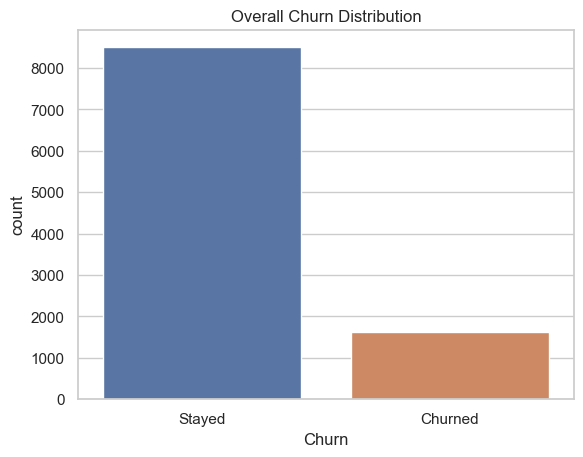

In [52]:
sns.countplot( df, x = 'Churn', hue = 'Churn')
plt.title("Overall Churn Distribution")
plt.xticks([0,1], ['Stayed', 'Churned'])
plt.legend().remove()
plt.show()

### Churn count by Gender

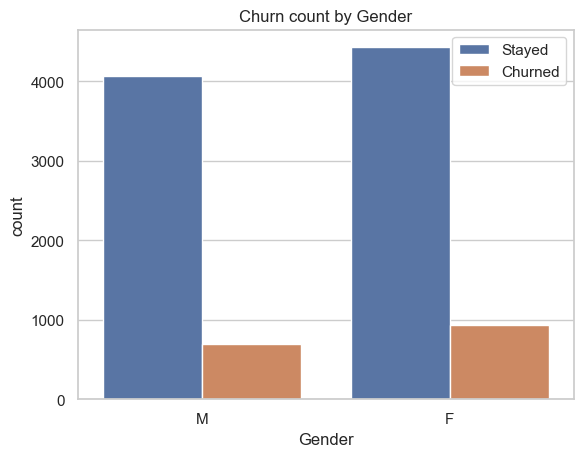

In [49]:
sns.countplot(df, x = 'Gender', hue ='Churn')
plt.title('Churn count by Gender')
plt.xticks(rotation = 0)
plt.legend(labels=['Stayed', 'Churned'])

### 3. Churn Rate by Age Group

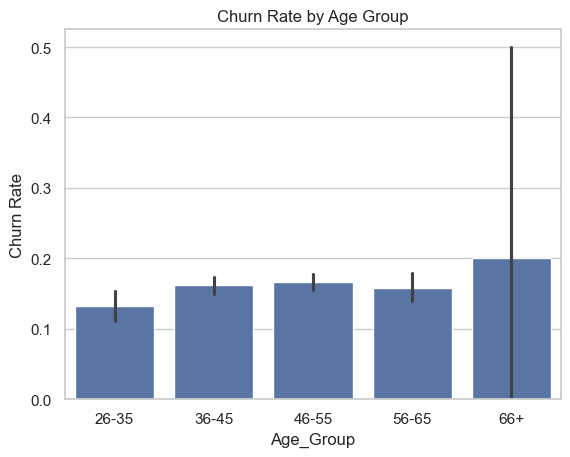

In [53]:
sns.barplot(data=df, x='Age_Group', y='Churn')
plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate")
plt.show()



### Distribution of Credit Limit By Churn status 

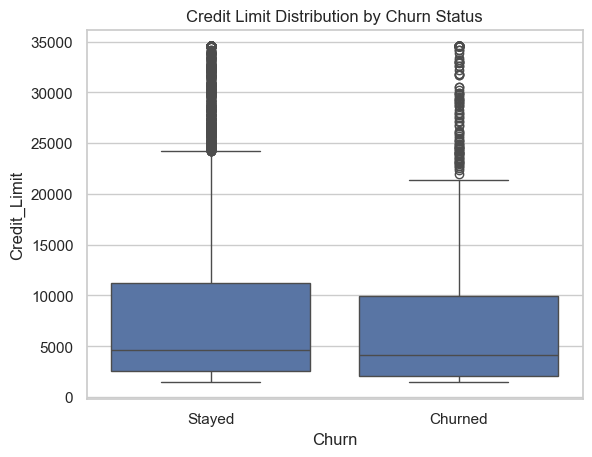

In [55]:
sns.boxplot(data=df, x = 'Churn', y = 'Credit_Limit')
plt.title("Credit Limit Distribution by Churn Status")
plt.xticks([0, 1], ['Stayed', 'Churned'])
plt.show()

### Churn by Card Category

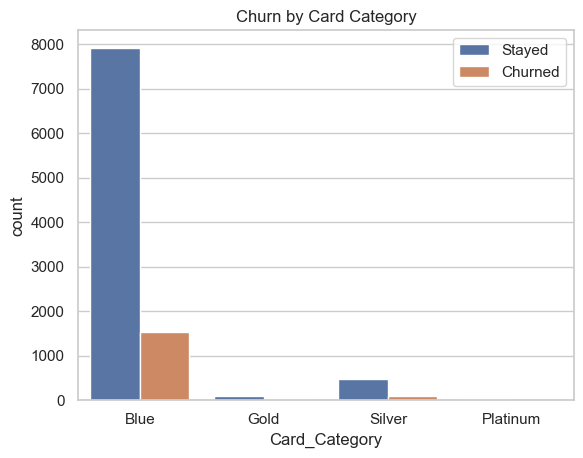

In [56]:
sns.countplot(data=df, x='Card_Category', hue='Churn')
plt.title("Churn by Card Category")
plt.legend(labels=['Stayed', 'Churned'])
plt.show()


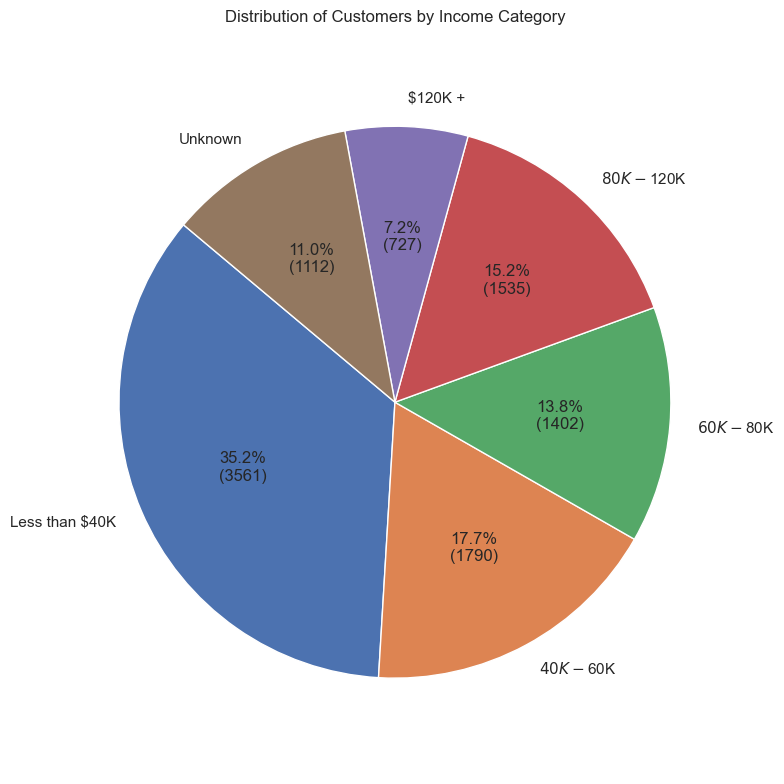

In [37]:
## We will use a pie chart for the visual representation of the income categories 

# to count and sort customers in each category
income_counts = df['Income_Category'].value_counts().sort_index() 

# to keep the Categories in order in our visualization 
income_order = [
    'Less than $40K', '$40K - $60K', '$60K - $80K',
    '$80K - $120K', '$120K +', 'Unknown'
]  


# Reorder using the definied order 
income_counts = income_counts.reindex(income_order)


#include the value count in the visualilzation
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct



# PLotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(income_counts,
        labels=income_counts.index,
        autopct=make_autopct(income_counts),
        startangle=140)
plt.title('Distribution of Customers by Income Category')
plt.axis('equal')
plt.tight_layout()
plt.show()

checking if any mapping failed

In [30]:
print(df['Income estimate'].isna().sum()) # count of unmapped or unknown which is anyways not required for 

1112


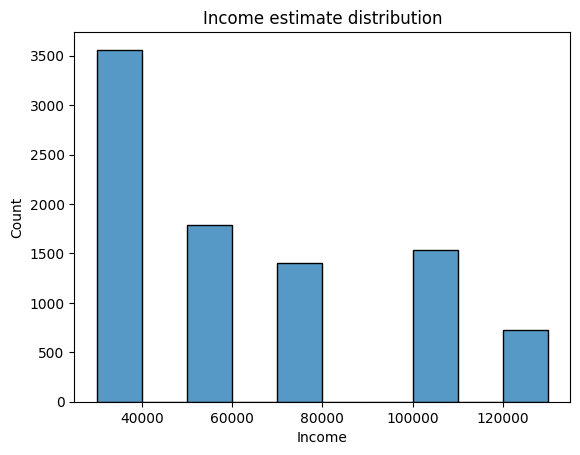

In [36]:
sns.histplot(df['Income estimate'].dropna(), bins = 10)
plt.title('Income estimate distribution')
plt.xlabel('Income')
plt.show()

In [45]:
corr = df[['Avg_Utilization_Ratio','Income estimate']].corr
print(corr)

<bound method DataFrame.corr of        Avg_Utilization_Ratio  Income estimate
0                      0.061          70000.0
1                      0.105          30000.0
2                      0.000         100000.0
3                      0.760          30000.0
4                      0.000          70000.0
...                      ...              ...
10122                  0.462          50000.0
10123                  0.511          50000.0
10124                  0.000          30000.0
10125                  0.000          50000.0
10126                  0.189          30000.0

[10127 rows x 2 columns]>


### Credit Utilization By Income Band

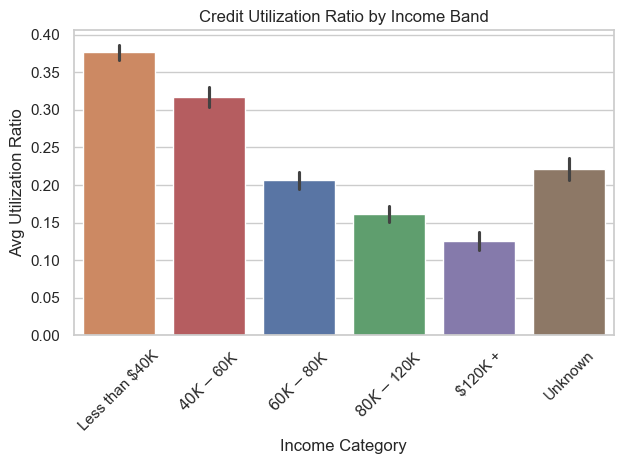

In [69]:
income_order = [
    'Less than $40K', '$40K - $60K', '$60K - $80K',
    '$80K - $120K', '$120K +', 'Unknown'
]

sns.barplot(df, x = 'Income_Category', y = 'Avg_Utilization_Ratio', hue ='Income_Category' ,order = income_order)
plt.title("Credit Utilization Ratio by Income Band")
plt.ylabel("Avg Utilization Ratio")
plt.xlabel("Income Category")
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

### Customer Count by Credit utilization

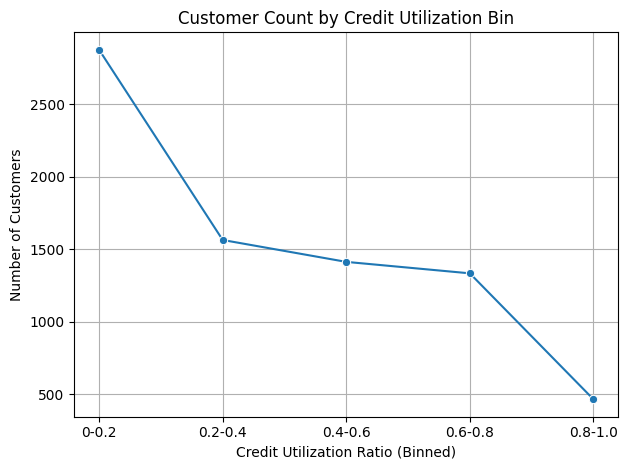

In [55]:
# Step 1: Bin the utilization ratio into ranges
df['Util_Bin'] = pd.cut(df['Avg_Utilization_Ratio'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                        labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])

# Step 2: Count customers in each bin
util_counts = df['Util_Bin'].value_counts().sort_index()

# Step 3: Plot the line chart
sns.lineplot(x=util_counts.index, y=util_counts.values, marker='o')
plt.title('Customer Count by Credit Utilization Bin')
plt.xlabel('Credit Utilization Ratio (Binned)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

### Credit Utilization by Income Category

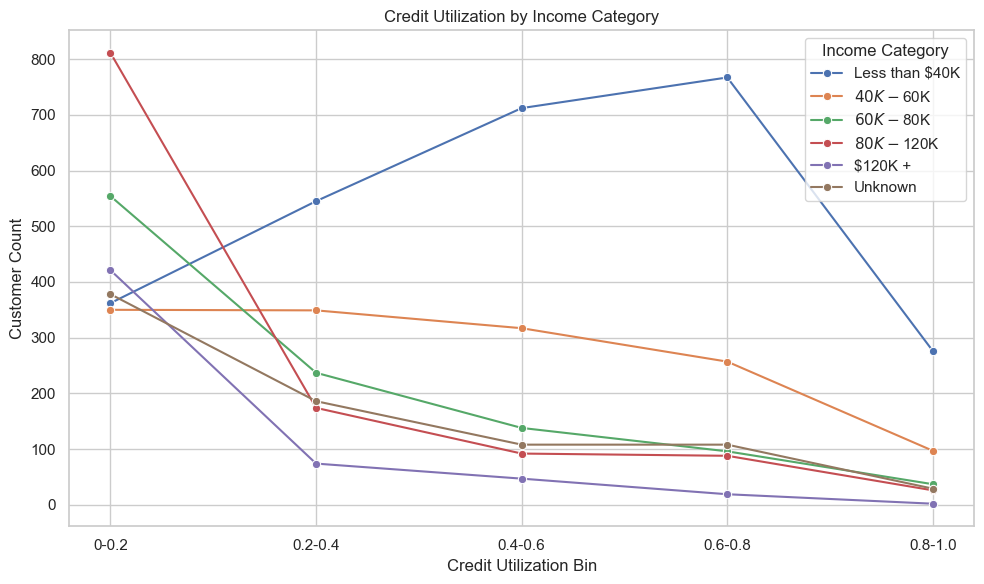

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create utilization bins
df['Util_Bin'] = pd.cut(df['Avg_Utilization_Ratio'], 
                        bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                        labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])

# Step 2: Order categories
income_order = [
    'Less than $40K', '$40K - $60K', '$60K - $80K',
    '$80K - $120K', '$120K +', 'Unknown'
]
df['Income_Category'] = pd.Categorical(df['Income_Category'], categories=income_order, ordered=True)

# Step 3: Count customers by Util_Bin and Income_Category
grouped = df.groupby(['Util_Bin', 'Income_Category'], observed=True).size().reset_index(name='Count')

# Step 4: Plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Util_Bin', y='Count', hue='Income_Category', marker='o')

plt.title('Credit Utilization by Income Category')
plt.xlabel('Credit Utilization Bin')
plt.ylabel('Customer Count')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Income Category')
plt.show()


### Distribution of customers on the basis of total revolving balance 

Text(0.5, 1.0, 'Distribution of customers on the basis of Revolving Balance')

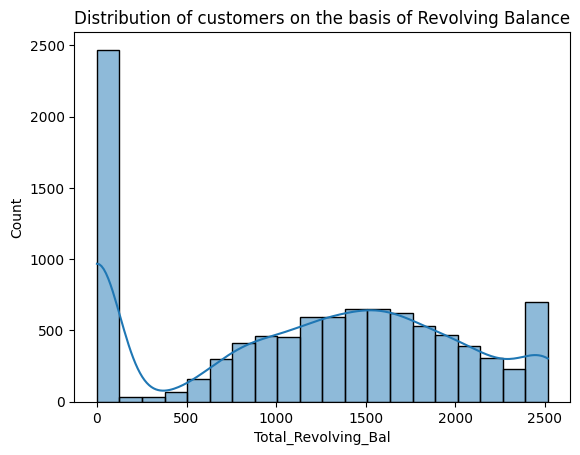

In [66]:
sns.histplot(df['Total_Revolving_Bal'], kde = True)
plt.title("Distribution of customers on the basis of Revolving Balance")

### Analysing the impact of customers having dependants on their usage ratio 

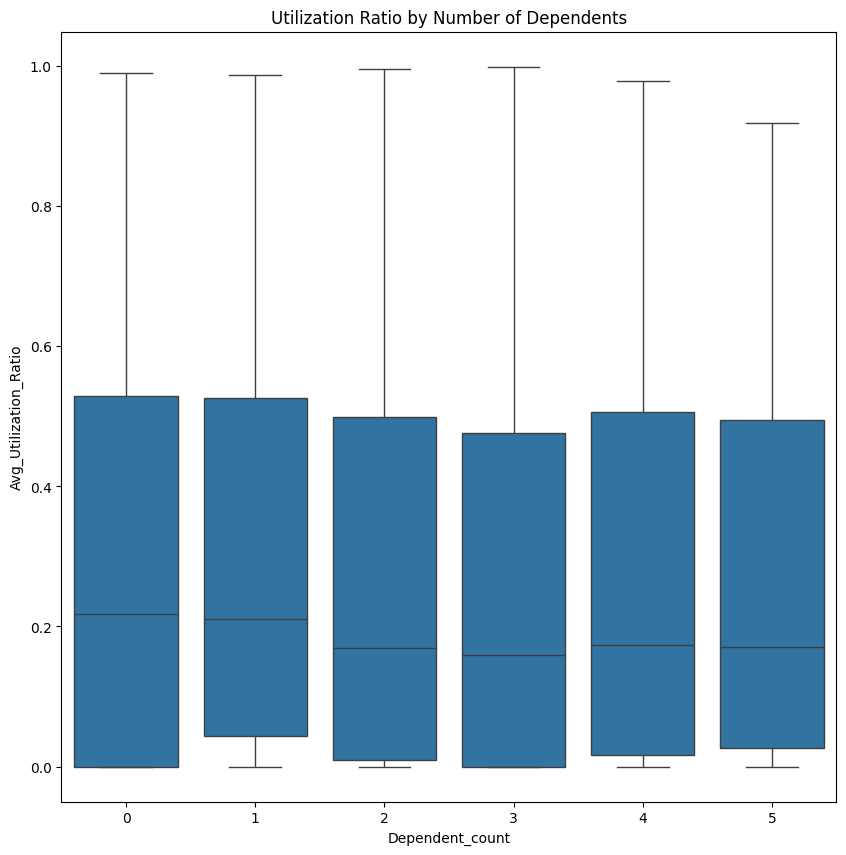

In [72]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df, x = 'Dependent_count', y = 'Avg_Utilization_Ratio')
plt.title("Utilization Ratio by Number of Dependents")
plt.show()

In [74]:
df['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

### Heatmap of Correlation

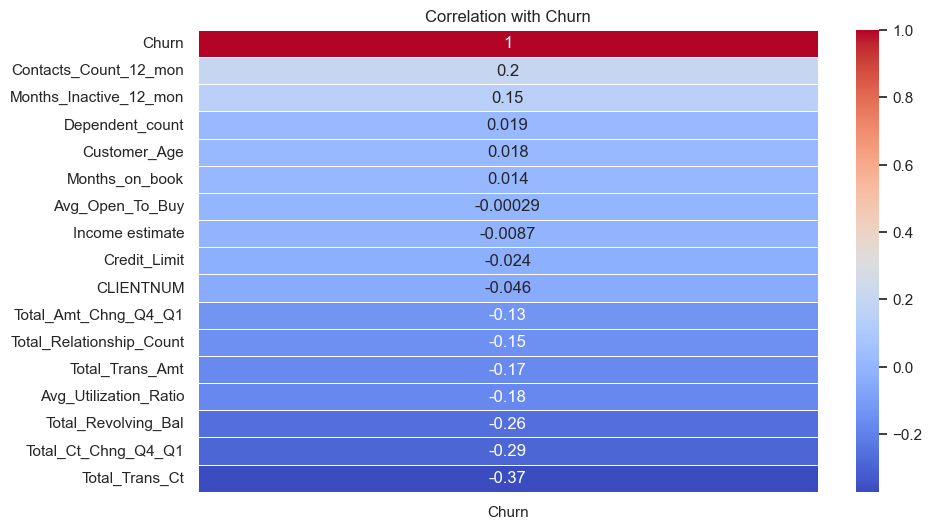

In [57]:
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation with Churn")
plt.show()